In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
import sklearn as sk

In [26]:
filepath = 'volve production data.xlsx'

In [27]:
daily_df = pd.read_excel(filepath, sheet_name='Daily Production Data')
monthly_df = pd.read_excel(filepath, sheet_name='Monthly Production Data')

In [28]:
print(daily_df.shape)
print(monthly_df.shape)
print(daily_df.head())
print(daily_df.columns)
print(monthly_df.columns)

(15634, 24)
(527, 10)
     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...

In [29]:
print("\n Data Type")
print(daily_df.dtypes)

print("\n Missing Values")
print(daily_df.isnull().sum())


 Data Type
DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object

In [30]:
well_name = daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name]

In [31]:
well_data = well_data.sort_values("DATEPRD")

In [32]:
wells = daily_df['NPD_WELL_BORE_NAME'].unique()
print(f"Total number of wells: {len(wells)}")

Total number of wells: 7


In [33]:
well_summary = daily_df.groupby('NPD_WELL_BORE_NAME')[["BORE_OIL_VOL", "BORE_WAT_VOL", "BORE_GAS_VOL"]].agg(['sum']).reset_index()
well_summary = well_summary.sort_values(('BORE_OIL_VOL', 'sum'), ascending=False)
print("\n Well Summary (Top Wells by Oil Volume)")
print(well_summary.head(10))


 Well Summary (Top Wells by Oil Volume)
  NPD_WELL_BORE_NAME BORE_OIL_VOL BORE_WAT_VOL  BORE_GAS_VOL
                              sum          sum           sum
2          15/9-F-12   4579609.55   6833320.37  6.675423e+08
3          15/9-F-14   3942233.39   7121249.74  5.780095e+08
1          15/9-F-11   1147849.10   1090806.27  1.743105e+08
0         15/9-F-1 C    177709.33    207302.39  2.644092e+07
4        15/9-F-15 D    148518.56     52366.40  2.250535e+07
6           15/9-F-5     41160.68     13533.18  6.561826e+06
5           15/9-F-4         0.00         0.00  0.000000e+00


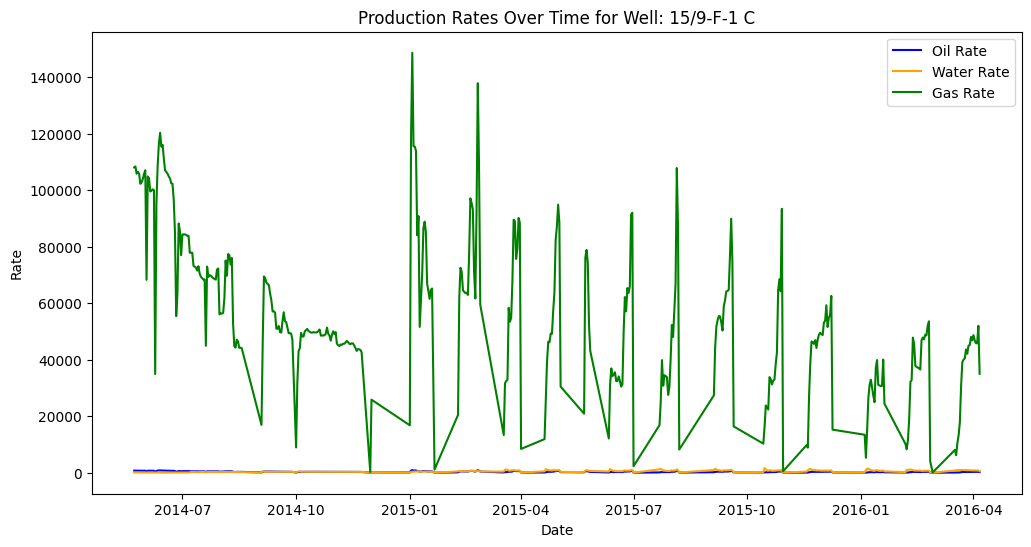

In [34]:
well_data = well_data[(well_data['BORE_OIL_VOL'] != 0) & 
                      (well_data['BORE_WAT_VOL'] != 0) & 
                      (well_data['BORE_GAS_VOL'] != 0)]
plt.figure(figsize=(12, 6))
plt.plot(well_data['DATEPRD'], well_data['BORE_OIL_VOL'], label='Oil Rate', color='blue')
plt.plot(well_data['DATEPRD'], well_data['BORE_WAT_VOL'], label='Water Rate', color='orange')
plt.plot(well_data['DATEPRD'], well_data['BORE_GAS_VOL'], label='Gas Rate', color='green')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title(f'Production Rates Over Time for Well: {well_name}')
plt.legend()
plt.show()  

<Axes: title={'center': 'Oil production for all wells'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

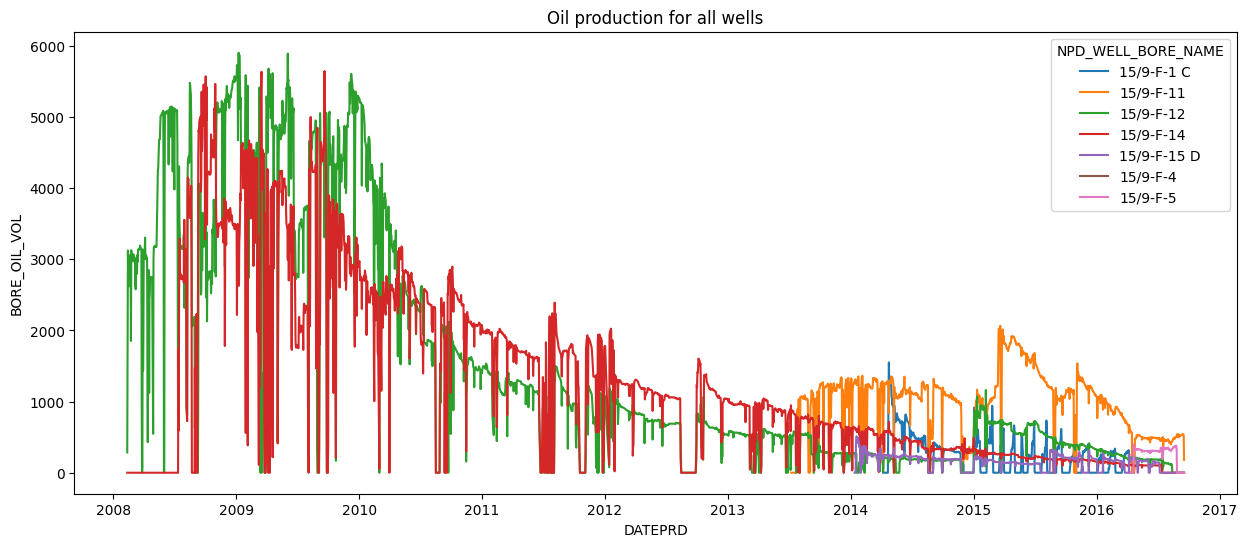

In [35]:
plt.figure(figsize=(15,6))
plt.title("Oil production for all wells")
sns.lineplot(data = daily_df ,x ="DATEPRD" , y = "BORE_OIL_VOL" ,hue ="NPD_WELL_BORE_NAME",)

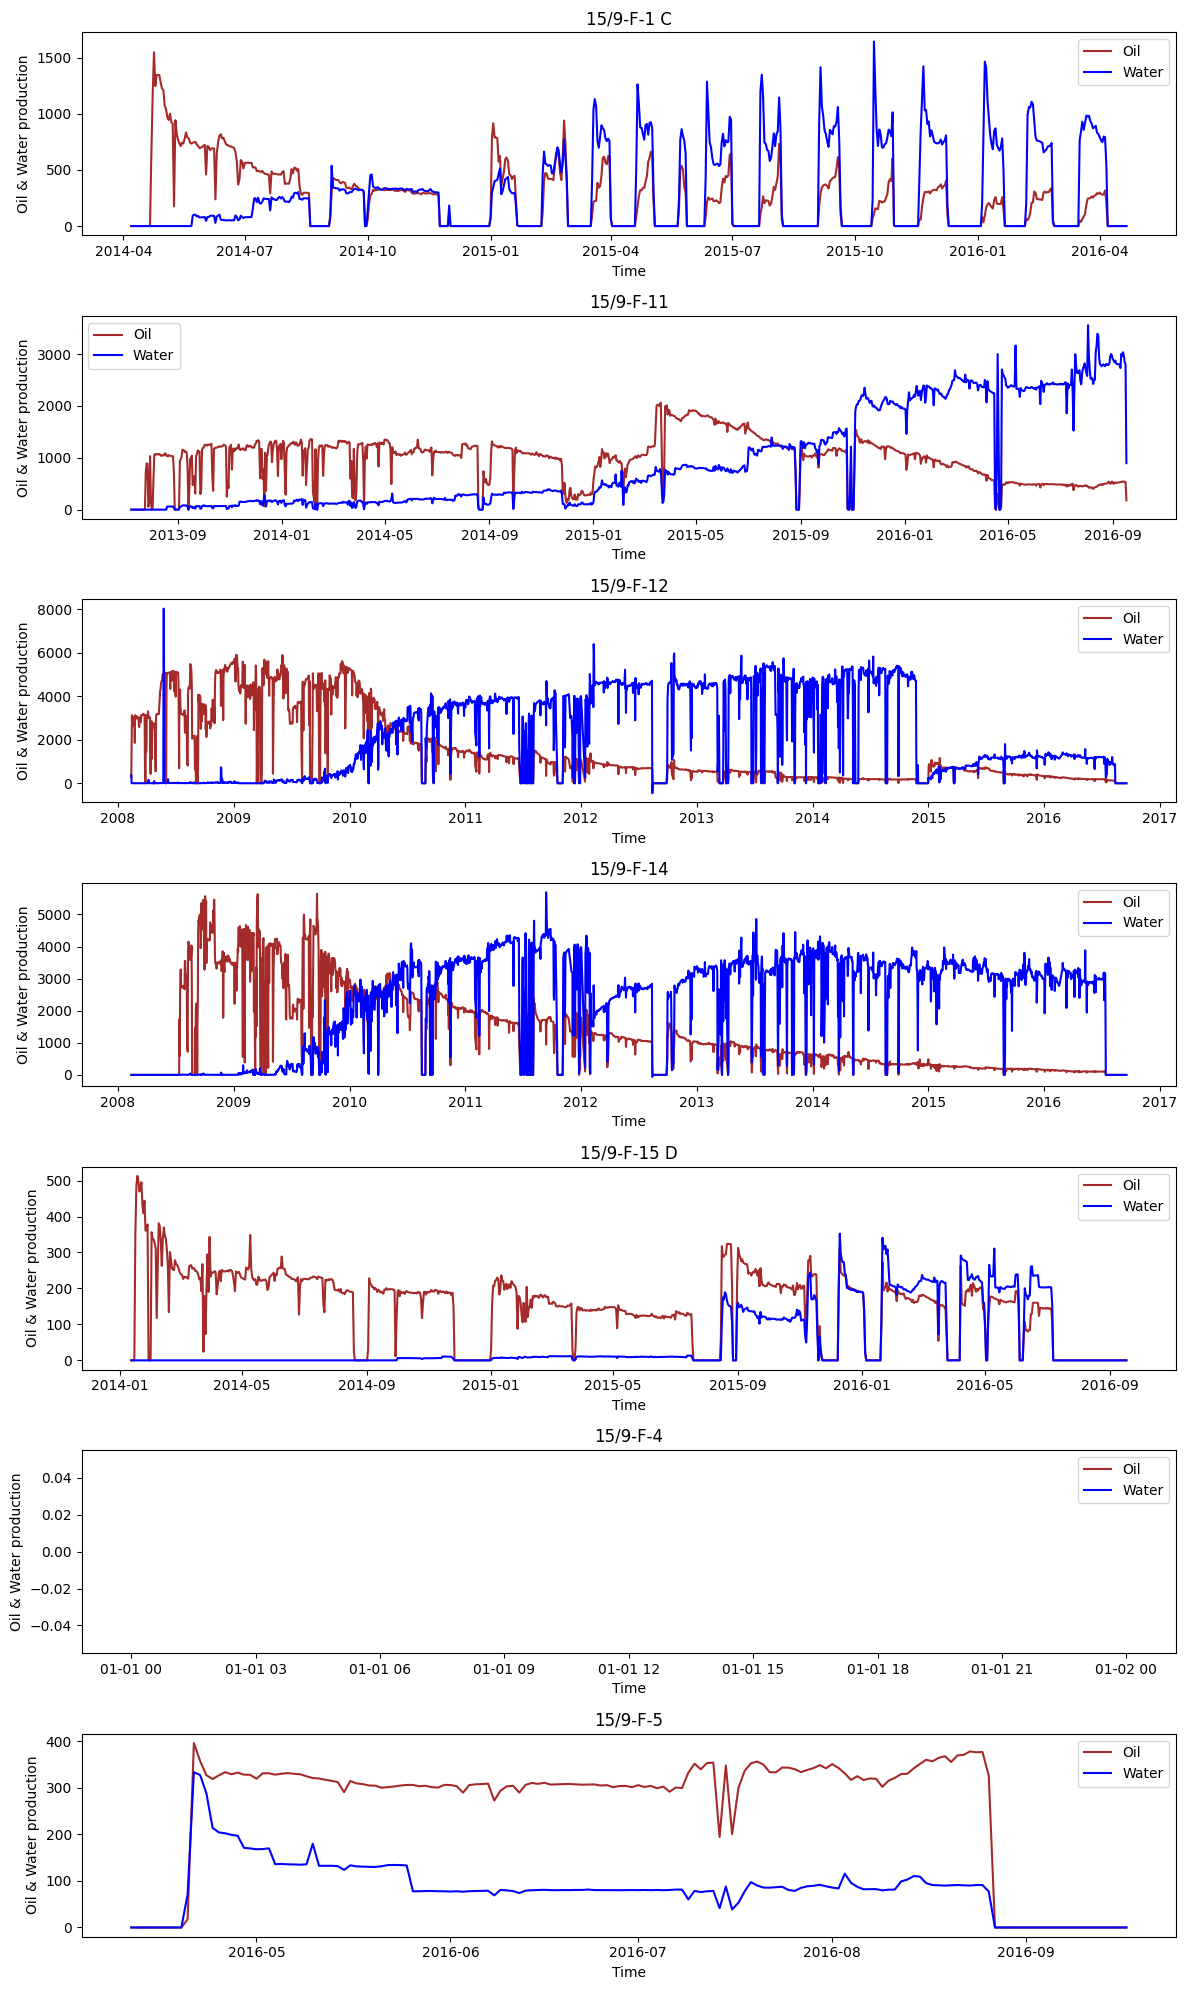

In [36]:
# Relationship between oil production and water production for each well
wells = daily_df["NPD_WELL_BORE_NAME"].unique()  # Get all unique well names
plt.figure(figsize=(12,20))                      # Set the overall figure size

for i, well in enumerate(wells):                 # Loop through each well
    d = daily_df[daily_df["NPD_WELL_BORE_NAME"]==well]  # Filter data for this well
    plt.subplot(len(wells),1,i+1)                # Create a subplot for each well
    plt.plot(d["DATEPRD"], d["BORE_OIL_VOL"], label="Oil",color = "Brown")    # Plot oil production over time
    plt.plot(d["DATEPRD"], d["BORE_WAT_VOL"], label = "Water", color = "Blue")    # Plot water production over time
    plt.title(well)                              # Title with well name
    plt.xlabel("Time")                           # X-axis label
    plt.ylabel("Oil & Water production")         # Y-axis label
    plt.legend()                                 # Show legend

plt.tight_layout()                               # Adjust layout to prevent overlap
plt.show()                                         # Show the plots (missing parentheses, should be plt.show())

/var/folders/w3/6g99c6wj1wn4plrslv4vrd2m0000gn/T/ipykernel_96918/1177116378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


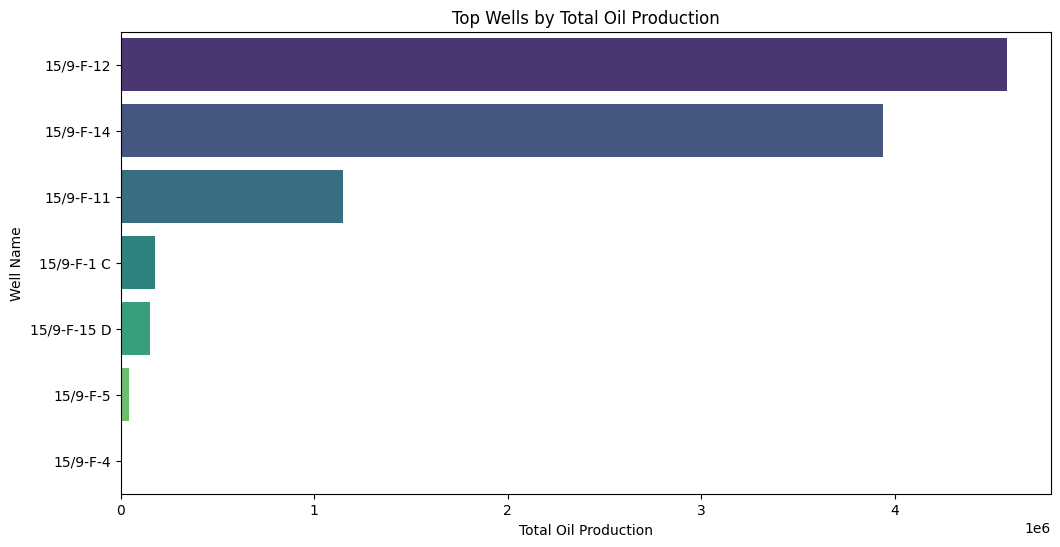

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(
	x=('BORE_OIL_VOL', 'sum'),
	y=('NPD_WELL_BORE_NAME', ''),
	data=well_summary.head(10),
	palette='viridis'
)
plt.title('Top Wells by Total Oil Production')
plt.xlabel('Total Oil Production')
plt.ylabel('Well Name')
plt.show()

In [38]:
target_col = 'BORE_OIL_VOL'
features_cols = [
    "ON_STREAM_HRS",
    "AVG_CHOKE_SIZE_P",
    "AVG_WHP_P",
    "AVG_WHT_P",
    "AVG_DOWNHOLE_PRESSURE",
    "AVG_DOWNHOLE_TEMPERATURE",
    "AVG_DP_TUBING",
    "AVG_ANNULUS_PRESS"
]
well_name=daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data=daily_df[daily_df['NPD_WELL_BORE_NAME']==well_name].sort_values("DATEPRD")
well_data[features_cols + [target_col]].head()

,ON_STREAM_HRS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,BORE_OIL_VOL
0,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,0.0,1.003059,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
2,0.0,0.979008,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
3,0.0,0.545759,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
4,0.0,1.215987,33.09788,10.47992,310.37614,96.87589,277.27826,0.0,0.0


In [39]:
well_data[features_cols] = well_data[features_cols].fillna(0)


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
well_data[features_cols] = scaler.fit_transform(well_data[features_cols])

In [41]:
import numpy as np

def create_sequences(data, features, target, window=7):
    sequences = []
    targets = []
    for i in range(len(data) - window):
        seq = data[features].iloc[i:i+window].values
        tgt = data[target].iloc[i+window]
        sequences.append(seq)
        targets.append(tgt)
    return np.array(sequences), np.array(targets)
X, y = create_sequences(well_data, features_cols, target_col, window=7)
print(f"Input shape: {X.shape}, Target shape: {y.shape}")

Input shape: (739, 7, 8), Target shape: (739,)


Mean Squared Error: 25380.82921007047
R2 Score: -0.4137985578413985


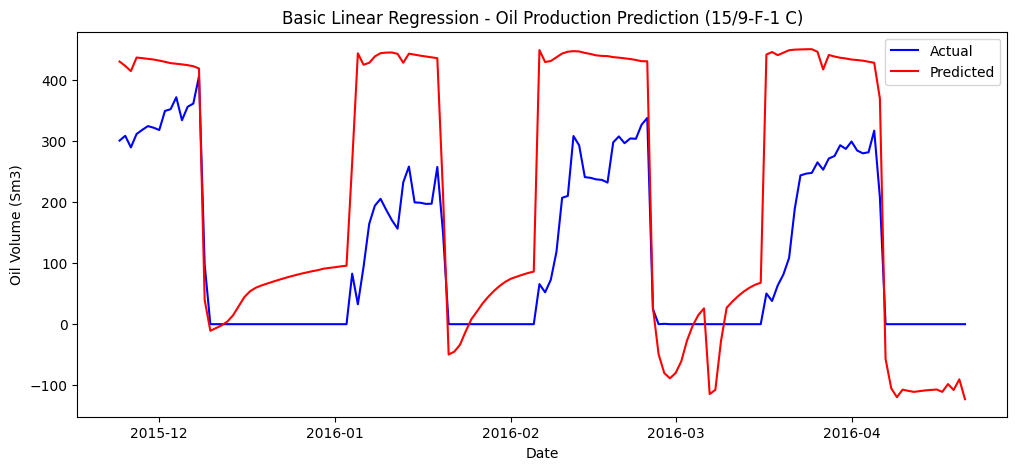

In [42]:
# 1️⃣ Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Select well data (first well)
well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name].sort_values("DATEPRD")

# 3️⃣ Select features and target
feature_cols = ["ON_STREAM_HRS", "AVG_CHOKE_SIZE_P", "AVG_WHP_P", "AVG_WHT_P"]
target_col = "BORE_OIL_VOL"

X = well_data[feature_cols].fillna(0)
y = well_data[target_col].fillna(0)

# 4️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5️⃣ Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6️⃣ Make predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 8️⃣ Plot predictions vs actual
plt.figure(figsize=(12,5))
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_pred, label="Predicted", color="red")
plt.title(f"Basic Linear Regression - Oil Production Prediction ({well_name})")
plt.xlabel("Date")
plt.ylabel("Oil Volume (Sm3)")
plt.legend()
plt.show()


In [43]:
future_features = [[24, 80, 300, 50]]  # Example: hours, choke%, WHP, WHT
predicted_oil = model.predict(future_features)
print(f"Predicted Oil Production for next day: {predicted_oil[0]:.2f} Sm3")

Predicted Oil Production for next day: 851.86 Sm3


/Users/anmol/volve_production_forecast/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


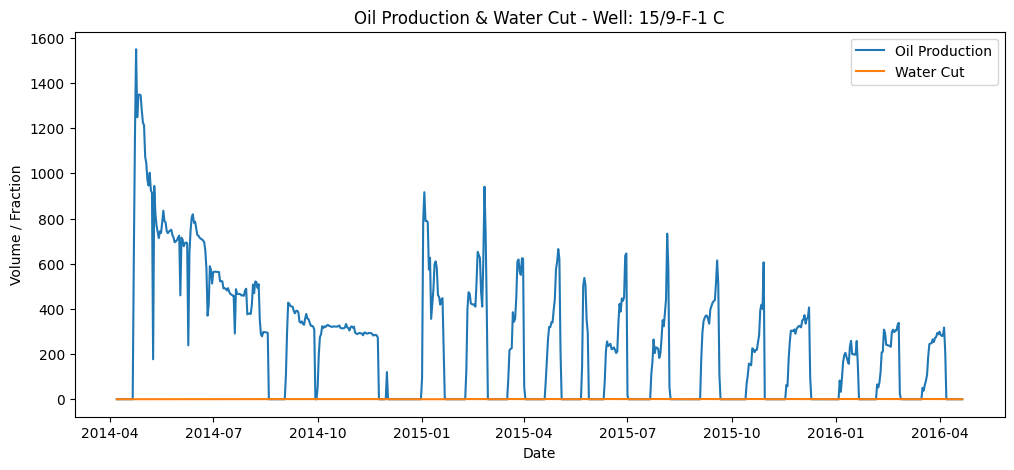

In [44]:
# 1️⃣ Convert date column to datetime
daily_df["DATEPRD"] = pd.to_datetime(daily_df["DATEPRD"])

# 2️⃣ Sort data by date for each well
daily_df = daily_df.sort_values(["NPD_WELL_BORE_NAME", "DATEPRD"])

# 3️⃣ Fill missing numeric values with 0
numeric_cols = ["ON_STREAM_HRS", "AVG_CHOKE_SIZE_P", "AVG_WHP_P", 
                "AVG_WHT_P", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]
daily_df[numeric_cols] = daily_df[numeric_cols].fillna(0)

# 4️⃣ Create new features (optional but useful)
# Example: Water cut (WC) = Water / (Oil + Water)
daily_df["WATER_CUT"] = daily_df["BORE_WAT_VOL"] / (daily_df["BORE_OIL_VOL"] + daily_df["BORE_WAT_VOL"] + 1e-6)

# Example: Gas-Oil Ratio (GOR) = Gas / Oil
daily_df["GOR"] = daily_df["BORE_GAS_VOL"] / (daily_df["BORE_OIL_VOL"] + 1e-6)

# 5️⃣ Quick visualization: Oil vs Water Cut for one well
well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name]

plt.figure(figsize=(12,5))
plt.plot(well_data["DATEPRD"], well_data["BORE_OIL_VOL"], label="Oil Production")
plt.plot(well_data["DATEPRD"], well_data["WATER_CUT"], label="Water Cut")
plt.title(f"Oil Production & Water Cut - Well: {well_name}")
plt.xlabel("Date")
plt.ylabel("Volume / Fraction")
plt.legend()
plt.show()


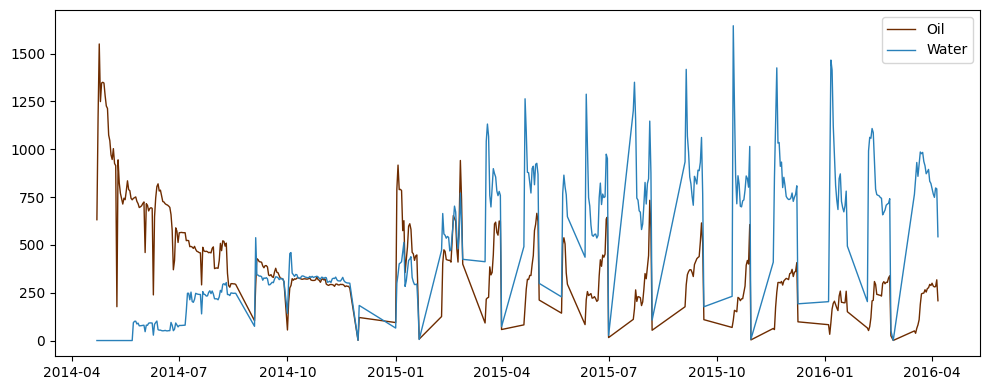

In [45]:
well = daily_df['NPD_WELL_BORE_NAME'].unique()[0]
d = daily_df[daily_df['NPD_WELL_BORE_NAME']==well].sort_values('DATEPRD')
d = d[d['BORE_OIL_VOL']>0]   # remove zeros if desired
plt.figure(figsize=(10,4))
plt.plot(d['DATEPRD'], d['BORE_OIL_VOL'], color='#6E2C00', label='Oil', linewidth=1)
plt.plot(d['DATEPRD'], d['BORE_WAT_VOL'], color='#2980B9', label='Water', linewidth=1)
plt.legend(); plt.tight_layout(); plt.show()

In [46]:

cols = ["BORE_OIL_VOL", "BORE_WAT_VOL"]
if set(cols).issubset(daily_df.columns):
    daily_df.drop(columns=cols, inplace=True)
else:
    missing = [c for c in cols if c not in daily_df.columns]
    print(f"Cannot drop columns, missing in daily_df: {missing}")


In [47]:

plt.figure(figsize=(10, 5))

plt.plot(daily_df["DATEPRD"], daily_df["BORE_OIL_VOL"], color="#6E2C00", label="oil_rate")
plt.plot(daily_df["DATEPRD"], daily_df["BORE_WAT_VOL"], color="#2980B9", label="water_rate")

plt.xlabel("Time", fontsize=13, labelpad=20)           
plt.ylabel("Rate", fontsize=13, labelpad=20, loc="center")

plt.title("Oil rate vs Water rate over time", fontsize=20, pad=20, loc="left")

plt.grid(which="major", linestyle="-", alpha=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle="--", alpha=0.1)

plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'BORE_OIL_VOL'

<Figure size 1000x500 with 0 Axes>

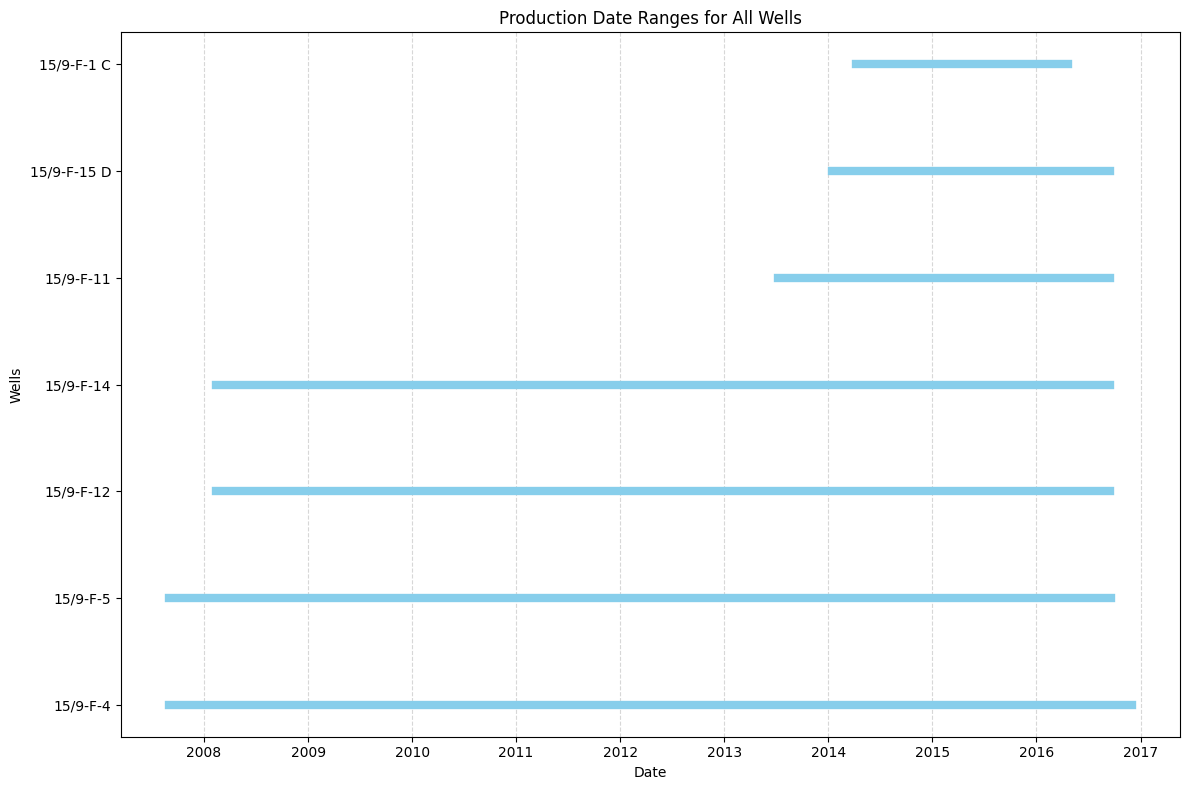

In [ ]:
import matplotlib.pyplot as plt

# 1️⃣ Get min and max date for each well
well_ranges = daily_df.groupby("NPD_WELL_BORE_NAME")["DATEPRD"].agg(["min","max"]).reset_index()

# 2️⃣ Sort wells by start date
well_ranges = well_ranges.sort_values("min")

# 3️⃣ Plot timeline
plt.figure(figsize=(12,8))
for i, row in enumerate(well_ranges.itertuples()):
    plt.plot([row.min, row.max], [i, i], color='skyblue', linewidth=6)
    
plt.yticks(range(len(well_ranges)), well_ranges["NPD_WELL_BORE_NAME"])
plt.xlabel("Date")
plt.ylabel("Wells")
plt.title("Production Date Ranges for All Wells")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Epoch 1/20


/Users/anmol/volve_production_forecast/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - val_loss: 0.0079
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0051
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - val_loss: 0.0045
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0027
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - val_loss: 0.0025
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0019
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0015
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - val_loss: 0.0015


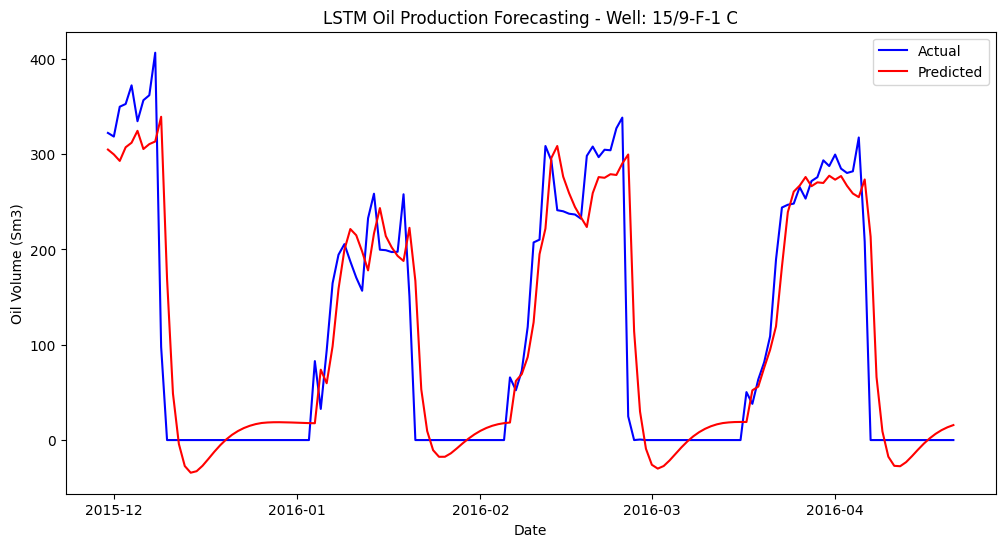

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name].sort_values("DATEPRD")

oil_data = well_data["BORE_OIL_VOL"].values.reshape(-1,1)

scaler = MinMaxScaler()
oil_scaled = scaler.fit_transform(oil_data)

def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 30
X, y = create_sequences(oil_scaled, lookback)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test,y_test), verbose=1)

y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,6))
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_test_rescaled, label="Actual", color="blue")
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_pred_rescaled, label="Predicted", color="red")
plt.title(f"LSTM Oil Production Forecasting - Well: {well_name}")
plt.xlabel("Date")
plt.ylabel("Oil Volume (Sm3)")
plt.legend()
plt.show()


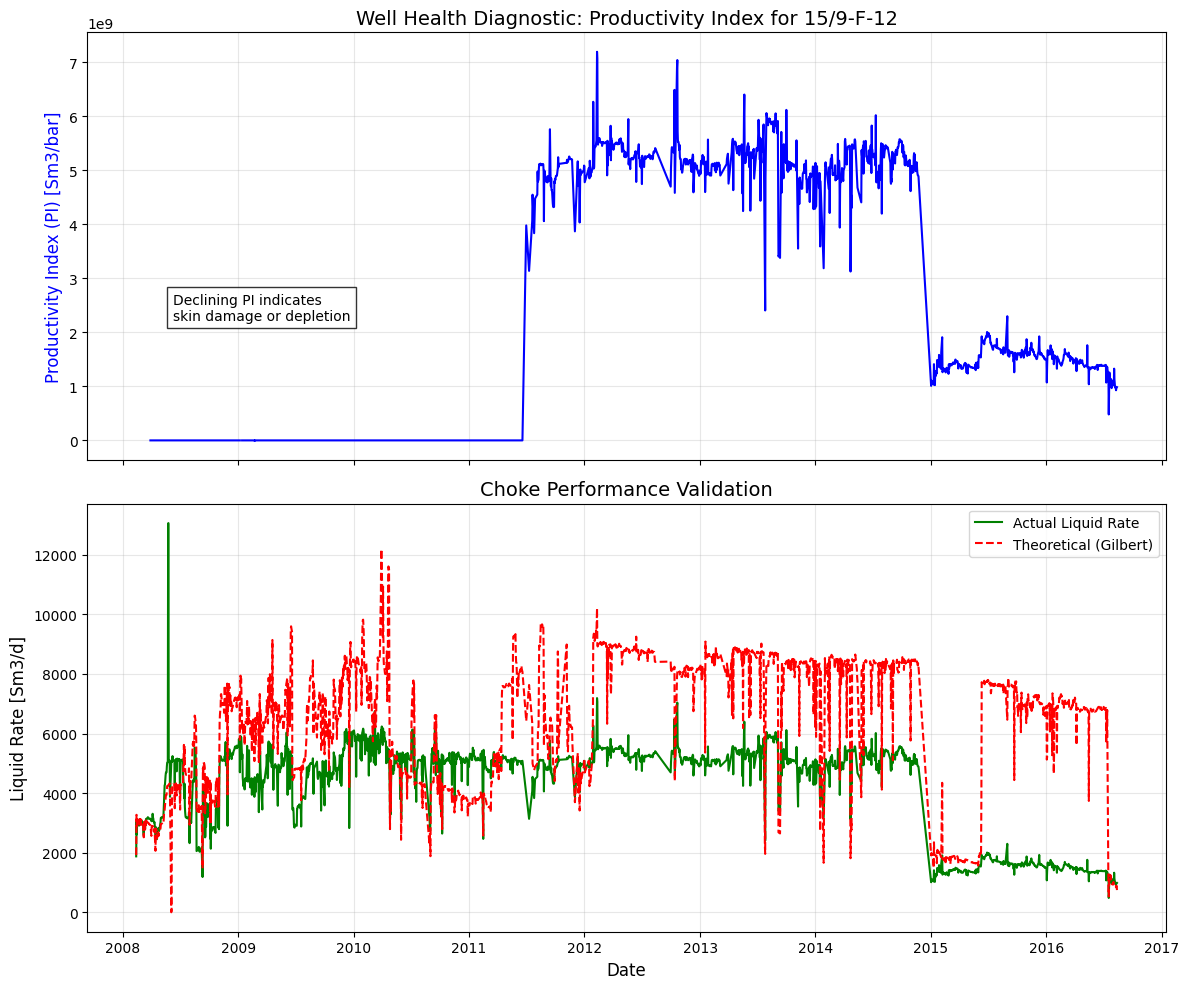

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
filepath = 'volve production data.xlsx'
daily_df = pd.read_excel(filepath, sheet_name='Daily Production Data')

# Convert date and sort
daily_df["DATEPRD"] = pd.to_datetime(daily_df["DATEPRD"])
daily_df = daily_df.sort_values(["NPD_WELL_BORE_NAME", "DATEPRD"])

# --- 2. Select a Specific Well for Analysis ---
# We use '15/9-F-12' as it has good production history
well_name = '15/9-F-12' 
df_eng = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name].copy()

# --- 3. Engineering Module A: Productivity Index (PI) ---
# Assumption: When ON_STREAM_HRS is 0, Downhole Pressure builds up to Reservoir Pressure
df_eng['Reservoir_Pressure'] = np.where(df_eng['ON_STREAM_HRS'] == 0, 
                                        df_eng['AVG_DOWNHOLE_PRESSURE'], 
                                        np.nan)
# Forward fill Reservoir Pressure to estimate it during flowing periods
df_eng['Reservoir_Pressure'] = df_eng['Reservoir_Pressure'].ffill()

# Filter for stable flowing days (>20 hours online)
df_prod = df_eng[(df_eng['ON_STREAM_HRS'] > 20) & (df_eng['BORE_OIL_VOL'] > 0)].copy()

# Drawdown = P_res - P_wf
df_prod['Drawdown'] = df_prod['Reservoir_Pressure'] - df_prod['AVG_DOWNHOLE_PRESSURE']

# PI = Total Liquid Rate / Drawdown
df_prod['Total_Liquid'] = df_prod['BORE_OIL_VOL'] + df_prod['BORE_WAT_VOL']
df_prod['PI'] = df_prod['Total_Liquid'] / (df_prod['Drawdown'] + 1e-6) # Avoid div/0

# --- 4. Engineering Module B: Gilbert Choke Correlation ---
# Gilbert Equation: Q_liquid = (P_wh * (S ^ 1.89)) / C
# P_wh = Tubing Head Pressure (AVG_WHP_P)
# S = Choke Size in 64ths of an inch (AVG_CHOKE_SIZE_P is usually %)
# Note: This is a simplified application to check trends, not an exact calibration
# We verify if theoretical flow matches actual flow.

# Convert Choke % to 64ths of an inch (Assuming 100% = 64/64 for this well type)
df_prod['Choke_64ths'] = (df_prod['AVG_CHOKE_SIZE_P'] / 100) * 64
C = 10 # Calibration constant (usually fitted to the specific field)

df_prod['Theoretical_Rate'] = (df_prod['AVG_WHP_P'] * (df_prod['Choke_64ths'] ** 1.89)) / C

# --- 5. Visualization ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot 1: Productivity Index Over Time
ax1.plot(df_prod['DATEPRD'], df_prod['PI'], color='blue', linewidth=1.5)
ax1.set_ylabel('Productivity Index (PI) [Sm3/bar]', fontsize=12, color='blue')
ax1.set_title(f'Well Health Diagnostic: Productivity Index for {well_name}', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.text(df_prod['DATEPRD'].iloc[100], df_prod['PI'].mean(), 
         "Declining PI indicates\nskin damage or depletion", 
         bbox=dict(facecolor='white', alpha=0.8))

# Plot 2: Choke Performance (Actual vs Theoretical)
ax2.plot(df_prod['DATEPRD'], df_prod['Total_Liquid'], color='green', label='Actual Liquid Rate')
ax2.plot(df_prod['DATEPRD'], df_prod['Theoretical_Rate'], color='red', linestyle='--', label='Theoretical (Gilbert)')
ax2.set_ylabel('Liquid Rate [Sm3/d]', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_title('Choke Performance Validation', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Fitted Parameters: qi=9252.65, Di=0.0012, b=0.00


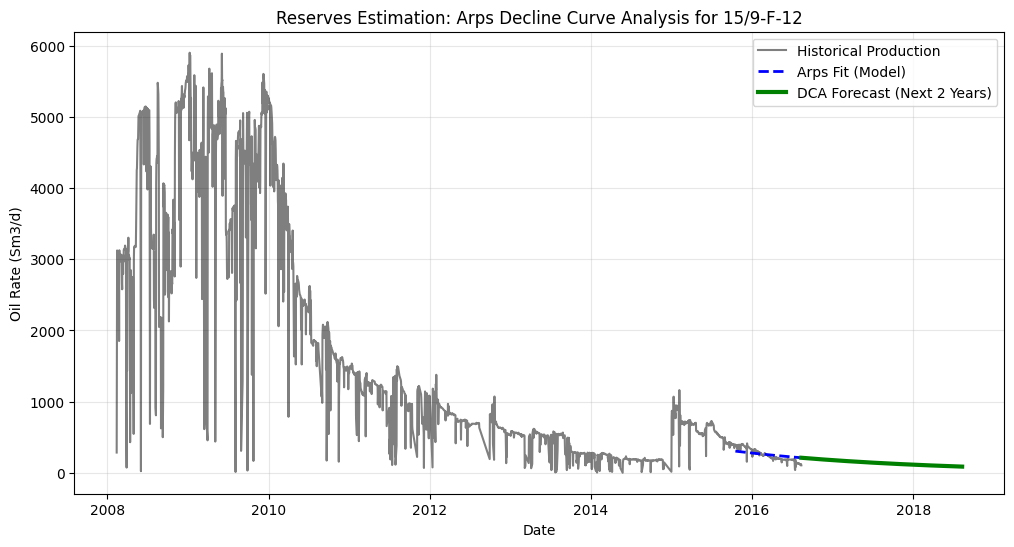

Estimated Recoverable Reserves (next 2 years): 0.10 Million Sm3


In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. Setup Data (Using the same well as before) ---
# Ensure daily_df is loaded (run the previous loading block if needed)
well_name = '15/9-F-12' 
df_dca = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name].copy()
df_dca = df_dca[df_dca['BORE_OIL_VOL'] > 0] # Only productive days

# Create a 'Time' column (days since start)
df_dca['Days_Online'] = (df_dca['DATEPRD'] - df_dca['DATEPRD'].min()).dt.days

# --- 2. Define the Arps Decline Model ---
# q(t) = qi / (1 + b * Di * t)^(1/b)  (Hyperbolic)
# For simplicity, we often use Exponential (b=0): q(t) = qi * exp(-Di * t)

def hyperbolic_decline(t, qi, Di, b):
    # Stabilize the function to prevent division by zero or overflows
    return qi / np.power((1 + b * Di * t), 1/b)

# --- 3. Fit the Model to the Data ---
# We use the last 300 days of data to forecast the future trend, 
# as early life data often has "flush production" that distorts long-term trends.
train_df = df_dca.iloc[-300:] 

t_data = train_df['Days_Online'].values
q_data = train_df['BORE_OIL_VOL'].values

# Initial guesses for the optimizer: [qi, Di, b]
# qi = max rate, Di = 0.01 (nominal decline), b = 0.5 (typical hyperbolic)
p0 = [max(q_data), 0.005, 0.5]
bounds = ([0, 0, 0], [np.inf, 1, 1]) # b is usually between 0 and 1

try:
    popt, pcov = curve_fit(hyperbolic_decline, t_data, q_data, p0=p0, bounds=bounds)
    qi_fit, Di_fit, b_fit = popt
    print(f"Fitted Parameters: qi={qi_fit:.2f}, Di={Di_fit:.4f}, b={b_fit:.2f}")
except:
    print("Curve fit failed. Try adjusting initial guesses or bounds.")
    qi_fit, Di_fit, b_fit = max(q_data), 0.001, 0.5

# --- 4. Forecast Future Production ---
# Create future timeline (next 730 days / 2 years)
last_day = df_dca['Days_Online'].max()
future_days = np.arange(last_day, last_day + 730)
future_dates = pd.date_range(start=df_dca['DATEPRD'].max(), periods=730)

# Predict
q_forecast = hyperbolic_decline(future_days, qi_fit, Di_fit, b_fit)

# --- 5. Visualization ---
plt.figure(figsize=(12, 6))

# Historical Data
plt.plot(df_dca['DATEPRD'], df_dca['BORE_OIL_VOL'], color='black', alpha=0.5, label='Historical Production')

# The "Fit" on training data (to show accuracy)
plt.plot(train_df['DATEPRD'], hyperbolic_decline(t_data, qi_fit, Di_fit, b_fit), 
         color='blue', linestyle='--', linewidth=2, label='Arps Fit (Model)')

# The Forecast
plt.plot(future_dates, q_forecast, color='green', linewidth=3, label='DCA Forecast (Next 2 Years)')

plt.title(f'Reserves Estimation: Arps Decline Curve Analysis for {well_name}')
plt.xlabel('Date')
plt.ylabel('Oil Rate (Sm3/d)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate EUR (Estimated Ultimate Recovery) added by the next 2 years
# Sum of daily rates = Total Volume
additional_reserves = np.sum(q_forecast)
print(f"Estimated Recoverable Reserves (next 2 years): {additional_reserves/1e6:.2f} Million Sm3")

Analyzing 7 wells...
Skipping 15/9-F-1 C: Injection Well


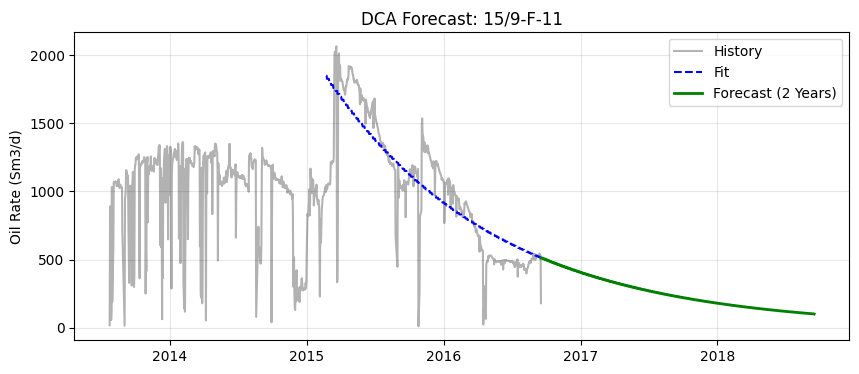

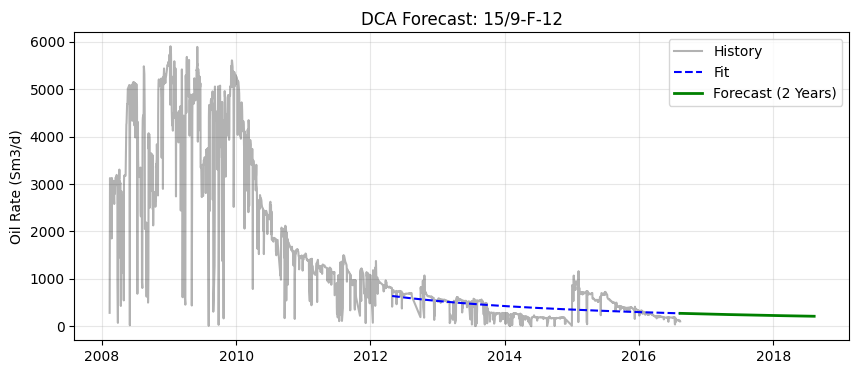

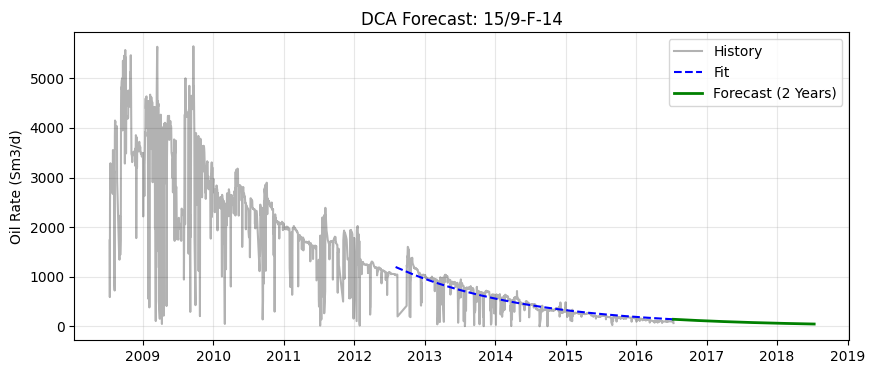

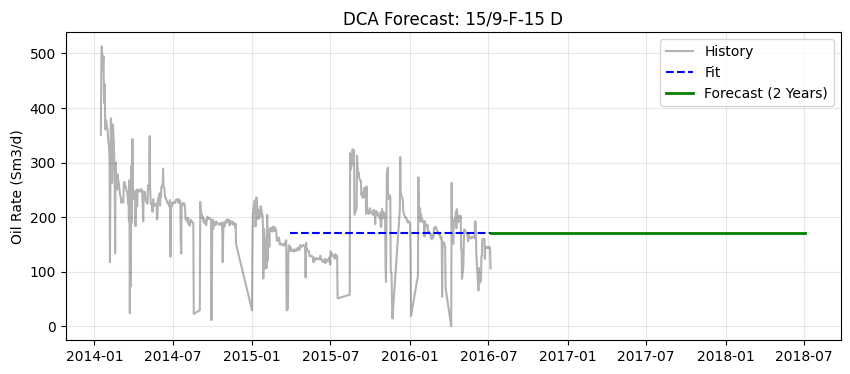

Skipping 15/9-F-4: Injection Well
Skipping 15/9-F-5: Injection Well

--- Field Reserves Summary ---
     Well Name  Decline Rate (Di)  b-factor  Est. Reserves (Sm3)
0    15/9-F-11               0.00      0.00           185,504.06
1    15/9-F-12               0.44      0.83           175,805.62
2    15/9-F-14               0.00      0.00            64,927.01
3  15/9-F-15 D               0.00      1.00           125,436.11


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. Helper Function: The Arps Decline Equation ---
def hyperbolic_decline(t, qi, Di, b):
    # Stabilize the function to prevent overflow
    return qi / np.power((1 + b * Di * t), 1/b)

# --- 2. Setup Loop ---
unique_wells = daily_df['NPD_WELL_BORE_NAME'].unique()
reserves_summary = [] # To store results for the table

# Create a figure for plotting (adjust size based on number of wells)
# We will plot each well individually to keep it readable
print(f"Analyzing {len(unique_wells)} wells...")

for well_name in unique_wells:
    
    # Filter data for specific well
    df_dca = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name].copy()
    
    # SKIP logic: Check if well is an injector or has no oil
    # 1. Check if it's an injector (WI = Water Injector)
    if df_dca['WELL_TYPE'].iloc[0] == 'WI':
        print(f"Skipping {well_name}: Injection Well")
        continue
        
    # 2. Check if it has enough production data
    df_dca = df_dca[df_dca['BORE_OIL_VOL'] > 0]
    if len(df_dca) < 30: # Need at least 30 days of data to fit a curve
        print(f"Skipping {well_name}: Insufficient data points")
        continue

    # Create 'Time' column (days since start of THAT well)
    df_dca['Days_Online'] = (df_dca['DATEPRD'] - df_dca['DATEPRD'].min()).dt.days
    
    # --- 3. Fit Curve ---
    # We use the last 50% of data to capture the most recent decline trend
    cutoff_index = int(len(df_dca) * 0.5)
    train_df = df_dca.iloc[cutoff_index:] 
    
    t_data = train_df['Days_Online'].values
    q_data = train_df['BORE_OIL_VOL'].values
    
    # Initial Guess: [qi, Di, b]
    p0 = [max(q_data), 0.005, 0.5]
    bounds = ([0, 0, 0], [np.inf, 1, 1]) 
    
    try:
        popt, pcov = curve_fit(hyperbolic_decline, t_data, q_data, p0=p0, bounds=bounds, maxfev=5000)
        qi_fit, Di_fit, b_fit = popt
    except:
        print(f"Fitting failed for {well_name}, using simple exponential fallback.")
        qi_fit, Di_fit, b_fit = max(q_data), 0.001, 0.01 # Fallback params

    # --- 4. Forecast Next 2 Years ---
    last_day = df_dca['Days_Online'].max()
    future_days = np.arange(last_day, last_day + 730)
    future_dates = pd.date_range(start=df_dca['DATEPRD'].max(), periods=730)
    q_forecast = hyperbolic_decline(future_days, qi_fit, Di_fit, b_fit)
    
    # Calculate Reserves (sum of forecast)
    eur_next_2_years = np.sum(q_forecast)
    reserves_summary.append({
        'Well Name': well_name,
        'Decline Rate (Di)': Di_fit,
        'b-factor': b_fit,
        'Est. Reserves (Sm3)': eur_next_2_years
    })

    # --- 5. Plotting ---
    plt.figure(figsize=(10, 4))
    plt.plot(df_dca['DATEPRD'], df_dca['BORE_OIL_VOL'], color='black', alpha=0.3, label='History')
    plt.plot(train_df['DATEPRD'], hyperbolic_decline(t_data, qi_fit, Di_fit, b_fit), 
             color='blue', linestyle='--', label='Fit')
    plt.plot(future_dates, q_forecast, color='green', linewidth=2, label='Forecast (2 Years)')
    
    plt.title(f'DCA Forecast: {well_name}')
    plt.ylabel('Oil Rate (Sm3/d)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- 6. Final Summary Table ---
print("\n--- Field Reserves Summary ---")
summary_df = pd.DataFrame(reserves_summary)
# Format large numbers for readability
pd.options.display.float_format = '{:,.2f}'.format
print(summary_df)